<a href="https://colab.research.google.com/github/ednei-code/astroqu-mica-detec-o-molecular/blob/main/astroquimica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ednei Vicente - Cientista de Dados**

# **Análise de Complexidade Molecular e Detectabilidade Espectroscópica em Catálogos Astroquímicos**

**Introdução**

A astroquímica busca compreender a formação, a evolução e a distribuição das moléculas no meio interestelar, a partir de observações espectroscópicas realizadas em diferentes ambientes astrofísicos. Catálogos moleculares compilam informações fundamentais sobre milhares de espécies químicas, incluindo sua composição elementar, complexidade estrutural e riqueza espectral, refletida pelo número de linhas observáveis associadas a cada molécula.

A detectabilidade espectroscópica de uma molécula não é uniforme e depende de múltiplos fatores físico-químicos, como massa molecular, número de átomos, diversidade de elementos e estrutura interna. Entender como essas propriedades se relacionam com a riqueza espectral é essencial tanto para a interpretação de observações astronômicas quanto para a construção de modelos mais realistas de química interestelar.

Neste contexto, a análise de dados oferece ferramentas eficazes para explorar grandes catálogos moleculares, identificar padrões estatísticos e revelar estruturas latentes que não são evidentes por inspeção direta.

# **Objetivo do Projeto**

O objetivo deste projeto é analisar um catálogo de moléculas interestelares com o intuito de identificar padrões de **complexidade molecular, composição química e detectabilidade espectroscópica**, medida pelo número de linhas espectrais catalogadas (n_lines). Ao final, o projeto busca construir um modelo de **segmentação por clusterização** para descobrir grupos naturais de moléculas com propriedades físico-químicas semelhantes.

**Pergunta Central**

**Quais características físico-químicas — como massa molecular, número de átomos, diversidade de elementos e composição química — estão mais associadas a uma maior riqueza espectral (n_lines) e como as moléculas se organizam em grupos naturais com base nessas propriedades?**

**Visão Geral do Processo Analítico**

O projeto segue um pipeline estruturado que inclui auditoria e preparação dos dados, análise exploratória, investigação de relações estatísticas entre variáveis e, por fim, aplicação de técnicas de aprendizado não supervisionado para identificar perfis moleculares distintos. Todas as etapas são documentadas com foco em interpretação científica e reprodutibilidade.

**Fontes de Dados e Créditos**

Os dados utilizados neste projeto são derivados de catálogos espectroscópicos amplamente utilizados na astroquímica observacional, que compilam informações físico-químicas e espectrais de moléculas detectadas no meio interestelar.

As principais fontes científicas associadas a esses catálogos incluem:

CDMS — Cologne Database for Molecular Spectroscopy
Base de dados espectroscópica mantida pela Universidade de Colônia, amplamente utilizada para identificação de moléculas em observações astronômicas.
🔗 https://cdms.astro.uni-koeln.de/

JPL Molecular Spectroscopy Catalog (NASA)
Catálogo de referência mantido pelo Jet Propulsion Laboratory, contendo transições rotacionais e vibracionais de espécies moleculares relevantes para astroquímica.
🔗 https://spec.jpl.nasa.gov/

Os arquivos analisados neste projeto (molecules_full_catalog.csv e molecules_reduced.csv) representam versões consolidadas e estruturadas desses catálogos, organizadas para fins de análise estatística e aprendizado de máquina. O uso dos dados tem caráter educacional e científico, sem fins comerciais, respeitando as diretrizes de citação e atribuição das fontes originais.

# **Setup do Ambiente e Importação de Bibliotecas**

In [44]:
# Manipulação de dados
import numpy as np
import pandas as pd

# Visualização
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Estatística
from scipy import stats

# Pré-processamento e ML
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Reprodutibilidade
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Estilo dos gráficos
plt.style.use('fivethirtyeight')
sns.set_context("notebook")

print("Bibliotecas importadas com sucesso. Estilo gráfico definido.")


Bibliotecas importadas com sucesso. Estilo gráfico definido.


In [45]:
# ==============================
# Leitura dos dados
# ==============================

# Caminhos dos arquivos
path_full = "/content/sample_data/molecules_full_catalog.csv"
path_reduced = "/content/sample_data/molecules_reduced.csv"

# Leitura dos CSVs
df_full = pd.read_csv(path_full)
df_reduced = pd.read_csv(path_reduced)

# Inspeção inicial
print("Dataset completo (full):")
display(df_full.head())
print(f"Shape: {df_full.shape}\n")

print("Dataset reduzido (reduced):")
display(df_reduced.head())
print(f"Shape: {df_reduced.shape}")


Dataset completo (full):


,molecule,name,n_lines,lg(q(1000)),lg(q(500)),lg(q(300)),lg(q(225)),lg(q(150)),lg(q(75)),lg(q(37.5)),...,name_raw,n_atoms,mass_approx,n_C,n_H,n_N,n_O,n_S,n_Si,n_elements_distinct
0,HD,HD,20,1.2115,0.9135,0.7026,0.5876,0.4322,0.1964,0.0406,...,HD,2,1.008,0,1,0,0,0,0,2
1,H2D+,H2D+,196,NaN,2.2148,1.8834,1.6986,1.4401,0.9882,0.4919,...,H2D+,3,2.016,0,2,0,0,0,0,2
2,HD2+,HD2+,163,NaN,NaN,1.9098,1.7243,1.4652,1.0326,0.6405,...,HD2+,3,1.008,0,1,0,0,0,0,2
3,HeH+,HeH+,18,1.3320,1.0335,0.8192,0.7015,0.5406,0.2874,0.0904,...,HeH+,2,1.008,0,1,0,0,0,0,2
4,C-atom,C,2,0.9359,0.9177,0.8939,0.8744,0.8363,0.7295,0.5494,...,C-atom,1,12.011,1,0,0,0,0,0,1


Shape: (1294, 28)

Dataset reduzido (reduced):


,name_raw,n_lines,n_atoms,mass_approx,n_C,n_H,n_N,n_O,n_S,n_Si,n_elements_distinct
0,HD,20,2,1.008,0,1,0,0,0,0,2
1,H2D+,196,3,2.016,0,2,0,0,0,0,2
2,HD2+,163,3,1.008,0,1,0,0,0,0,2
3,HeH+,18,2,1.008,0,1,0,0,0,0,2
4,C-atom,2,1,12.011,1,0,0,0,0,0,1


Shape: (1294, 11)


📘 Dicionário de Dados

Este dicionário descreve as variáveis presentes nos arquivos molecules_full_catalog.csv (versão completa) e molecules_reduced.csv (versão reduzida), que representam um catálogo de moléculas interestelares utilizado em estudos de astroquímica e espectroscopia.

🔹 Identificação

molecule: identificador químico da espécie molecular no catálogo.

name: nome padronizado da molécula.

name_raw: nome original ou bruto da molécula conforme registrado na fonte de dados.

🔹 Detectabilidade Espectroscópica

n_lines: número de linhas espectrais catalogadas para a molécula. Atua como um proxy de detectabilidade observacional, refletindo a riqueza espectral associada à espécie.

🔹 Complexidade Estrutural

n_atoms: número total de átomos que compõem a molécula.

mass_approx: massa molecular aproximada da espécie.

n_elements_distinct: número de elementos químicos distintos presentes na molécula, utilizado como indicador de diversidade química.

🔹 Composição Química

n_C: número de átomos de carbono presentes na molécula.

n_H: número de átomos de hidrogênio presentes na molécula.

n_N: número de átomos de nitrogênio presentes na molécula.

n_O: número de átomos de oxigênio presentes na molécula.

n_S: número de átomos de enxofre presentes na molécula.

n_Si: número de átomos de silício presentes na molécula.

🔹 Propriedades Termodinâmicas

(apenas no arquivo molecules_full_catalog.csv)

lg(q(1000)): logaritmo da função de partição da molécula à temperatura de 1000 K.

lg(q(500)): logaritmo da função de partição à temperatura de 500 K.

lg(q(300)): logaritmo da função de partição à temperatura de 300 K.

lg(q(225)): logaritmo da função de partição à temperatura de 225 K.

lg(q(150)): logaritmo da função de partição à temperatura de 150 K.

lg(q(75)): logaritmo da função de partição à temperatura de 75 K.

lg(q(37.5)): logaritmo da função de partição à temperatura de 37.5 K.

Essas variáveis refletem a distribuição estatística das populações moleculares entre diferentes níveis energéticos e são fortemente dependentes da complexidade estrutural da molécula

Cada linha do **dataset** reduzido representa uma molécula interestelar distinta, identificada nos catálogos espectroscópicos. As colunas descrevem suas propriedades físico-químicas (**complexidade estrutural, composição elemental e riqueza espectral**), permitindo analisar como essas características se relacionam com a detectabilidade observacional.

In [46]:
# Exibir a primeira molécula do dataset reduzido

df_reduced.iloc[[0]]


,name_raw,n_lines,n_atoms,mass_approx,n_C,n_H,n_N,n_O,n_S,n_Si,n_elements_distinct
0,HD,20,2,1.008,0,1,0,0,0,0,2


**📌 Perguntas Analíticas do Projeto**

Q1. Como se distribuem a complexidade molecular e a diversidade química no catálogo
(n_atoms, mass_approx, n_elements_distinct)?

Q2. Quais elementos químicos dominam o catálogo e com que frequência aparecem
(C, H, N, O, S, Si)?

Q3. Como se distribui a detectabilidade espectroscópica (n_lines) e existem outliers altamente detectáveis?

Q4. Existe relação entre complexidade molecular (n_atoms, mass_approx) e riqueza espectral (n_lines)?

Q5. A diversidade química (n_elements_distinct) está associada a uma maior detectabilidade espectroscópica?

Q6. A presença de elementos específicos (O, N, S, Si) altera o comportamento de n_lines e da complexidade molecular?

Q7. Moléculas contendo enxofre (S) ou silício (Si) formam subgrupos distintos no catálogo?

Q8. (Dataset completo) Como a função de partição (lg(q(T)) ) varia com a temperatura e com a complexidade molecular?

Q9. Quais variáveis parecem mais informativas para explicar variações em n_lines?

Q10. Existem trade-offs claros entre massa molecular, diversidade química e detectabilidade espectroscópica?

# **🔹 1. Estrutura, tipos e valores ausentes**

In [47]:
print("=== Dataset completo (full) ===")
display(df_full.info())
print("\n")

print("=== Dataset reduzido (reduced) ===")
display(df_reduced.info())


=== Dataset completo (full) ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1294 entries, 0 to 1293
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   molecule             1294 non-null   object 
 1   name                 1294 non-null   object 
 2   n_lines              1294 non-null   int64  
 3   lg(q(1000))          166 non-null    float64
 4   lg(q(500))           357 non-null    float64
 5   lg(q(300))           1294 non-null   float64
 6   lg(q(225))           1274 non-null   float64
 7   lg(q(150))           1294 non-null   float64
 8   lg(q(75))            1270 non-null   float64
 9   lg(q(37.5))          1270 non-null   float64
 10  lg(q(18.75))         1293 non-null   float64
 11  lg(q(9.375))         1272 non-null   float64
 12  lg(q(5.000))         690 non-null    float64
 13  lg(q(2.725))         689 non-null    float64
 14  ver.                 1294 non-null   object 
 15  docume

None



=== Dataset reduzido (reduced) ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1294 entries, 0 to 1293
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name_raw             1294 non-null   object 
 1   n_lines              1294 non-null   int64  
 2   n_atoms              1294 non-null   int64  
 3   mass_approx          1294 non-null   float64
 4   n_C                  1294 non-null   int64  
 5   n_H                  1294 non-null   int64  
 6   n_N                  1294 non-null   int64  
 7   n_O                  1294 non-null   int64  
 8   n_S                  1294 non-null   int64  
 9   n_Si                 1294 non-null   int64  
 10  n_elements_distinct  1294 non-null   int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 111.3+ KB


None

# **🔹 2. Valores ausentes por coluna**

In [48]:
na_full = df_full.isna().sum().sort_values(ascending=False)
na_reduced = df_reduced.isna().sum().sort_values(ascending=False)

print("Valores ausentes - dataset completo:")
display(na_full[na_full > 0])

print("\nValores ausentes - dataset reduzido:")
display(na_reduced[na_reduced > 0])


Valores ausentes - dataset completo:


,0
lg(q(1000)),1128
entry,1113
lg(q(500)),937
lg(q(2.725)),605
lg(q(5.000)),604
lg(q(75)),24
lg(q(37.5)),24
lg(q(9.375)),22
lg(q(225)),20
lg(q(18.75)),1



Valores ausentes - dataset reduzido:


,0


# **🔹 3. Duplicatas**

In [49]:
# ==============================
# Duplicatas
# ==============================

dup_full = df_full.duplicated().sum()
dup_reduced = df_reduced.duplicated().sum()

print(f"Duplicatas no dataset completo: {dup_full}")
print(f"Duplicatas no dataset reduzido: {dup_reduced}")


Duplicatas no dataset completo: 0
Duplicatas no dataset reduzido: 0


### Auditoria Inicial dos Dados

A inspeção inicial confirma a estrutura dos datasets, incluindo o número de observações, os tipos das variáveis e a presença de valores ausentes. As variáveis numéricas correspondem às propriedades físico-químicas esperadas, enquanto os valores ausentes concentram-se principalmente nas propriedades termodinâmicas do dataset completo, o que é consistente com limitações experimentais e de catalogação. Não foram identificadas duplicatas relevantes que comprometam a análise.


**📌 Fase D — EDA Univariada**

🔹 1. Estatísticas descritivas das variáveis principais

Usaremos o dataset reduzido como base, pois ele é completo e estável.

In [50]:
# ==============================
# Estatísticas descritivas
# ==============================

vars_key = [
    "n_lines",
    "n_atoms",
    "mass_approx",
    "n_elements_distinct",
    "n_C", "n_H", "n_N", "n_O", "n_S", "n_Si"
]

desc_stats = df_reduced[vars_key].describe().T
desc_stats["IQR"] = desc_stats["75%"] - desc_stats["25%"]

desc_stats[["count", "mean", "std", "min", "25%", "50%", "75%", "max", "IQR"]]


,count,mean,std,min,25%,50%,75%,max,IQR
n_lines,1294.0,5861.579598,14230.665739,1.0,128.25,506.000,3292.000,133852.000,3163.750
n_atoms,1294.0,4.827666,3.065736,1.0,2.00,4.000,6.000,23.000,4.000
mass_approx,1294.0,45.931168,26.910876,0.0,28.01,46.025,60.096,171.158,32.086
n_elements_distinct,1294.0,2.617465,0.761428,1.0,2.00,3.000,3.000,5.000,1.000
n_C,1294.0,1.998454,2.160246,0.0,0.00,1.000,3.000,13.000,3.000
n_H,1294.0,1.397991,1.783319,0.0,0.00,1.000,2.000,10.000,2.000
n_N,1294.0,0.397991,0.557613,0.0,0.00,0.000,1.000,2.000,1.000
n_O,1294.0,0.306028,0.536965,0.0,0.00,0.000,1.000,2.000,1.000
n_S,1294.0,0.189335,0.405504,0.0,0.00,0.000,0.000,2.000,0.000
n_Si,1294.0,0.073416,0.269664,0.0,0.00,0.000,0.000,2.000,0.000


🔹 2. Assimetria e curtose (caudas longas)

In [51]:
# ==============================
# Assimetria e curtose
# ==============================

skew_kurt = pd.DataFrame({
    "skewness": df_reduced[vars_key].skew(),
    "kurtosis": df_reduced[vars_key].kurtosis()
})

skew_kurt


,skewness,kurtosis
n_lines,4.069248,20.055852
n_atoms,1.448118,3.154075
mass_approx,0.710732,1.464118
n_elements_distinct,0.115334,-0.136770
n_C,1.602178,3.274927
n_H,1.715135,2.980200
n_N,1.024904,0.040930
n_O,1.554146,1.487601
n_S,1.829088,2.061064
n_Si,3.625320,12.710499


🔹 3. Distribuições (histogramas)

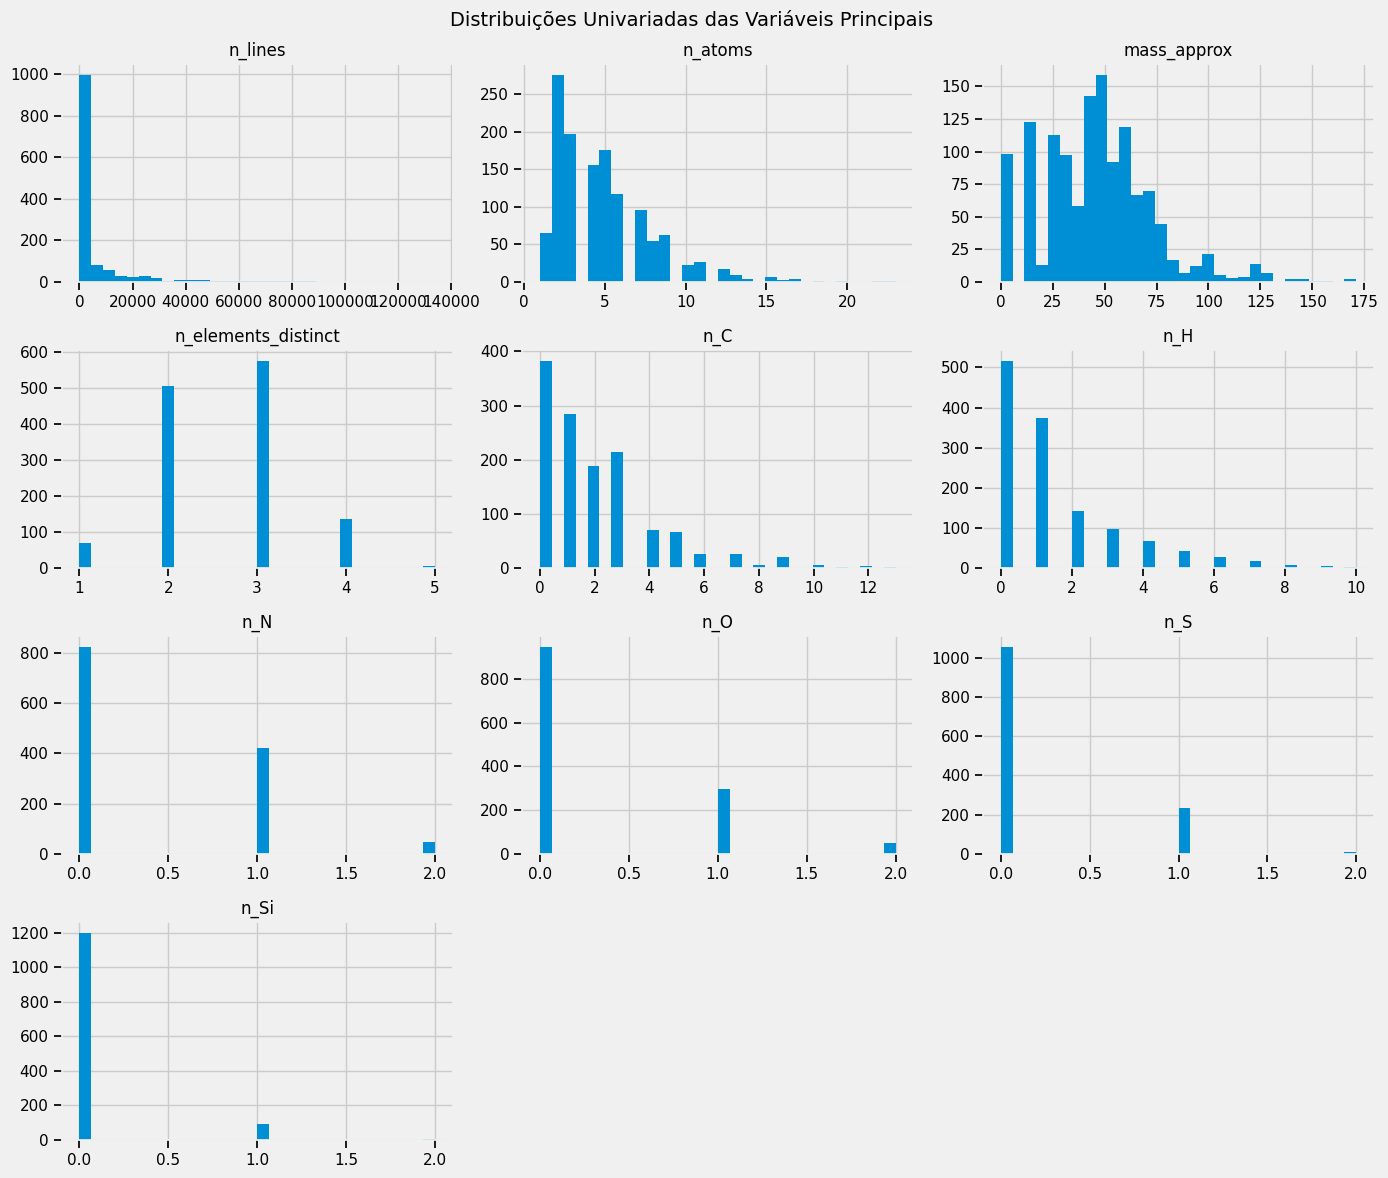

In [52]:
# ==============================
# Histogramas univariados
# ==============================

df_reduced[vars_key].hist(
    bins=30,
    figsize=(14, 12)
)

plt.suptitle("Distribuições Univariadas das Variáveis Principais", fontsize=14)
plt.tight_layout()
plt.show()


### EDA Univariada – Principais Observações

As distribuições univariadas indicam forte assimetria à direita em variáveis como `n_lines`, `n_atoms` e `mass_approx`, refletindo a predominância de moléculas simples no catálogo e a presença de poucos casos altamente complexos. As contagens de elementos mostram grande concentração em valores baixos, com elementos como S e Si aparecendo de forma esparsa. Esses padrões sugerem a necessidade de transformações (por exemplo, escala logarítmica) e cuidados com outliers nas análises subsequentes.


▶️ Próxima Etapa do Projeto

Próxima fase: EDA bivariada

Objetivo:
Investigar relações entre as variáveis físico-químicas e a detectabilidade espectroscópica (n_lines), quantificando associações e identificando padrões iniciais que orientem as análises temáticas e a etapa de clusterização.

Ações planejadas:

Analisar correlações (Spearman) entre variáveis numéricas

Visualizar relações-chave (n_atoms × n_lines, mass_approx × n_lines, n_elements_distinct × n_lines)

Avaliar possíveis trade-offs e efeitos de escala

Identificar variáveis candidatas para transformação e modelagem

## 🔹 Fase E — Análise Exploratória Bivariada (EDA)

Nesta fase, exploramos relações entre pares de variáveis com o objetivo de compreender
como propriedades físico-químicas das moléculas influenciam sua detectabilidade
espectroscópica, representada pelo número de linhas espectrais catalogadas (`n_lines`).

Dada a presença de assimetrias acentuadas e possíveis outliers, adotamos métricas
de correlação não paramétricas e visualizações em escala logarítmica, garantindo
robustez estatística e interpretação física consistente.


🔢 Etapa E1 — Correlações Estatísticas (Spearman)
📌 Justificativa

n_lines apresenta cauda longa

Relações não são estritamente lineares

Spearman captura monotonicidade, não linearidade

In [53]:
from scipy.stats import spearmanr

vars_bivariate = [
    "n_atoms",
    "mass_approx",
    "n_elements_distinct",
    "n_C", "n_H", "n_N", "n_O", "n_S", "n_Si"
]

results = []

for var in vars_bivariate:
    rho, p = spearmanr(df_reduced[var], df_reduced["n_lines"])
    results.append([var, rho, p])

corr_df = pd.DataFrame(
    results,
    columns=["Variável", "Spearman_rho", "p_valor"]
).sort_values(by="Spearman_rho", ascending=False)

corr_df


,Variável,Spearman_rho,p_valor
4,n_H,0.408240,3.843946e-53
0,n_atoms,0.334705,3.055106e-35
2,n_elements_distinct,0.166728,1.598794e-09
1,mass_approx,0.148277,8.398100e-08
3,n_C,0.083486,2.651328e-03
6,n_O,0.074396,7.421392e-03
5,n_N,0.017765,5.231599e-01
7,n_S,-0.035157,2.062847e-01
8,n_Si,-0.077241,5.435991e-03


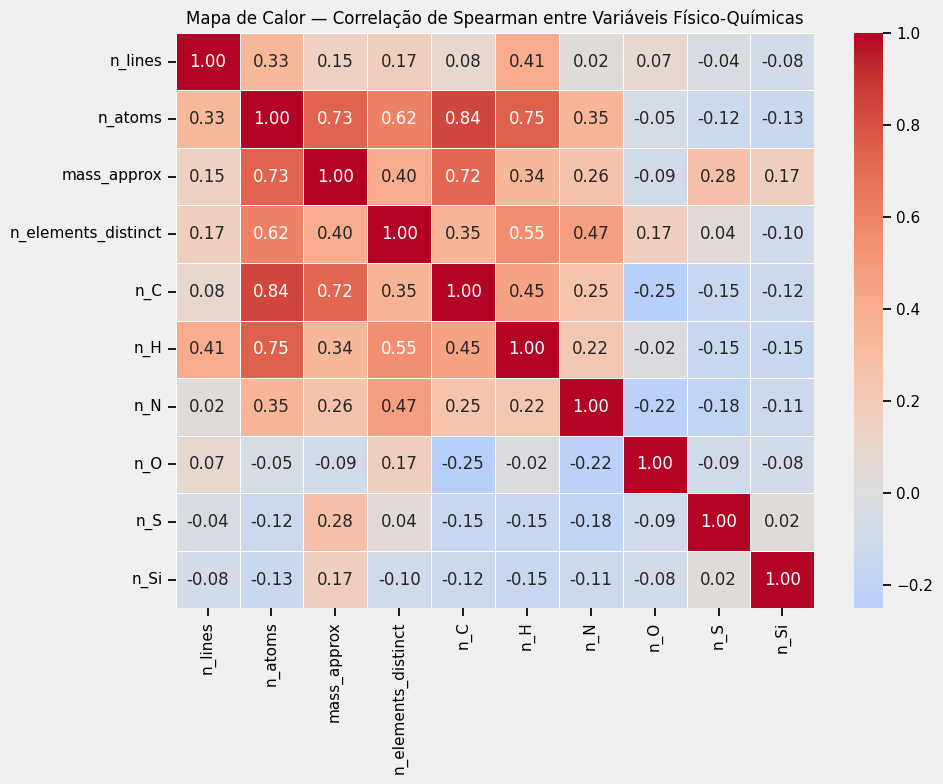

In [54]:
# Seleção das variáveis para correlação
vars_corr = [
    "n_lines",
    "n_atoms",
    "mass_approx",
    "n_elements_distinct",
    "n_C", "n_H", "n_N", "n_O", "n_S", "n_Si"
]

# Matriz de correlação de Spearman
corr_matrix = df_reduced[vars_corr].corr(method="spearman")

# Plot do heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)

plt.title("Mapa de Calor — Correlação de Spearman entre Variáveis Físico-Químicas")
plt.tight_layout()
plt.show()


O mapa de calor mostra que moléculas mais complexas tendem, em média, a apresentar um número maior de linhas espectrais, embora essa relação não seja muito forte. Também é possível observar que várias características químicas das moléculas estão relacionadas entre si, o que é esperado, já que fazem parte da mesma estrutura molecular. Esses resultados indicam que as variáveis carregam informações semelhantes e, por isso, é importante simplificá-las antes de formar grupos de moléculas, utilizando técnicas que reduzam essa redundância

**🔹 Perguntas Analíticas**

**Q1.** Como se distribuem a complexidade molecular e a diversidade química no catálogo?

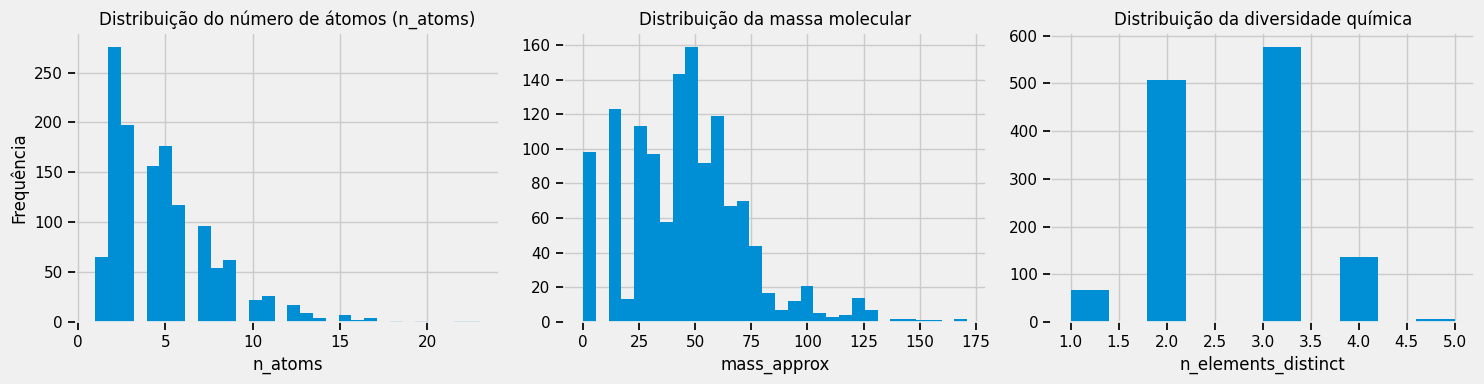

In [55]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(df_reduced["n_atoms"], bins=30)
axes[0].set_title("Distribuição do número de átomos (n_atoms)")
axes[0].set_xlabel("n_atoms")
axes[0].set_ylabel("Frequência")

axes[1].hist(df_reduced["mass_approx"], bins=30)
axes[1].set_title("Distribuição da massa molecular")
axes[1].set_xlabel("mass_approx")

axes[2].hist(df_reduced["n_elements_distinct"], bins=10)
axes[2].set_title("Distribuição da diversidade química")
axes[2].set_xlabel("n_elements_distinct")

plt.tight_layout()
plt.show()


Conclusão — Gráfico 1 (Distribuição do número de átomos)

O gráfico mostra que a grande maioria das moléculas do catálogo é composta por poucos átomos, enquanto apenas um número reduzido apresenta estruturas mais complexas. Isso indica que o catálogo é dominado por moléculas simples, com poucas espécies ocupando a faixa de maior complexidade molecular.

**Q2.** Quais elementos químicos dominam o catálogo e com que frequência aparecem?

 Gráfico — Frequência de ocorrência dos elementos químicos

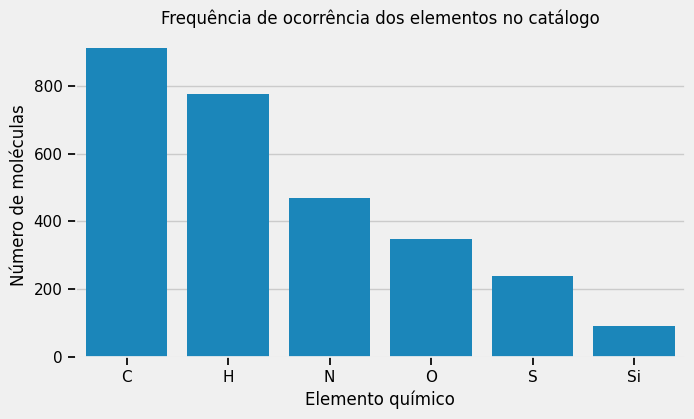

In [56]:
elements = ["n_C", "n_H", "n_N", "n_O", "n_S", "n_Si"]

freq = {
    el.replace("n_", ""): (df_reduced[el] > 0).sum()
    for el in elements
}

freq_df = (
    pd.DataFrame.from_dict(freq, orient="index", columns=["Frequência"])
      .sort_values(by="Frequência", ascending=False)
)

plt.figure(figsize=(7,4))
sns.barplot(x=freq_df.index, y=freq_df["Frequência"])
plt.xlabel("Elemento químico")
plt.ylabel("Número de moléculas")
plt.title("Frequência de ocorrência dos elementos no catálogo")
plt.show()


**Conclusão — Q2**

O gráfico indica que o catálogo é dominado por moléculas que contêm hidrogênio e carbono, refletindo a abundância desses elementos no meio interestelar. Nitrogênio e oxigênio aparecem com frequência intermediária, enquanto enxofre e silício são raros, formando subconjuntos específicos de moléculas dentro do catálogo.

**Q3.** Como se distribui a detectabilidade espectroscópica (n_lines) e existem outliers altamente detectáveis?
Gráficos recomendados

Histograma para ver a distribuição geral

Boxplot em escala log para evidenciar outliers

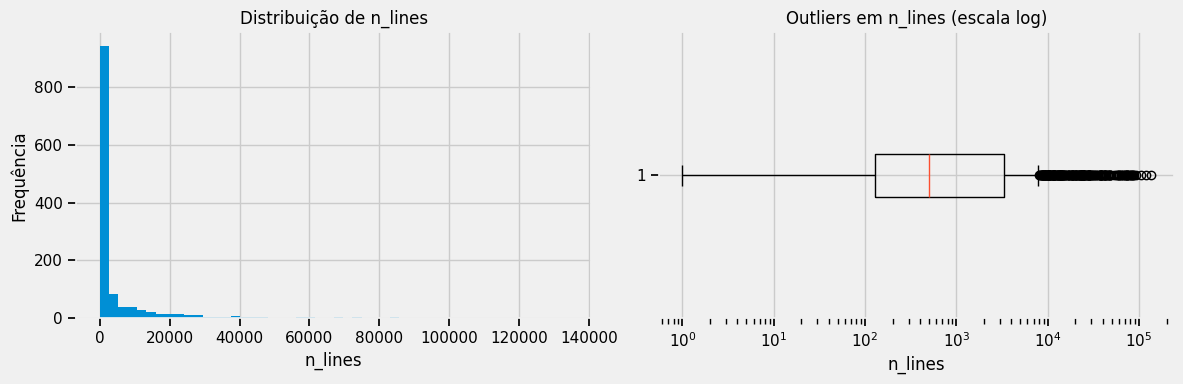

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histograma
axes[0].hist(df_reduced["n_lines"], bins=50)
axes[0].set_title("Distribuição de n_lines")
axes[0].set_xlabel("n_lines")
axes[0].set_ylabel("Frequência")

# Boxplot (escala log)
axes[1].boxplot(df_reduced["n_lines"], vert=False)
axes[1].set_xscale("log")
axes[1].set_title("Outliers em n_lines (escala log)")
axes[1].set_xlabel("n_lines")

plt.tight_layout()
plt.show()


Conclusão — Q3

A detectabilidade espectroscópica apresenta uma distribuição fortemente assimétrica, com a maioria das moléculas exibindo poucos registros espectrais e um pequeno grupo concentrando valores muito elevados de n_lines. Esses casos extremos indicam a presença de moléculas altamente detectáveis e justificam o uso de escala logarítmica e métodos robustos nas análises posteriores.

**Q4**. Existe relação entre complexidade molecular e riqueza espectral (n_lines)?

Se moléculas mais complexas tendem a ter mais linhas espectrais

Se essa relação é direta ou apresenta grande dispersão

Complexidade molecular × detectabilidade espectroscópica

Usaremos n_atoms como proxy direto de complexidade estrutural e escala log em n_lines.

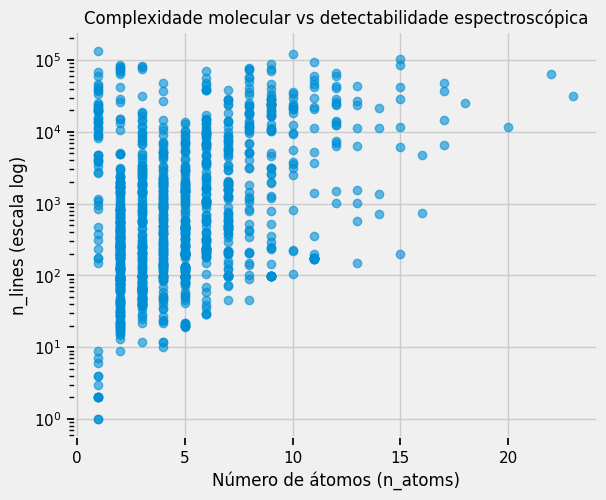

In [58]:
plt.figure(figsize=(6,5))
plt.scatter(
    df_reduced["n_atoms"],
    df_reduced["n_lines"],
    alpha=0.6
)
plt.yscale("log")
plt.xlabel("Número de átomos (n_atoms)")
plt.ylabel("n_lines (escala log)")
plt.title("Complexidade molecular vs detectabilidade espectroscópica")
plt.show()


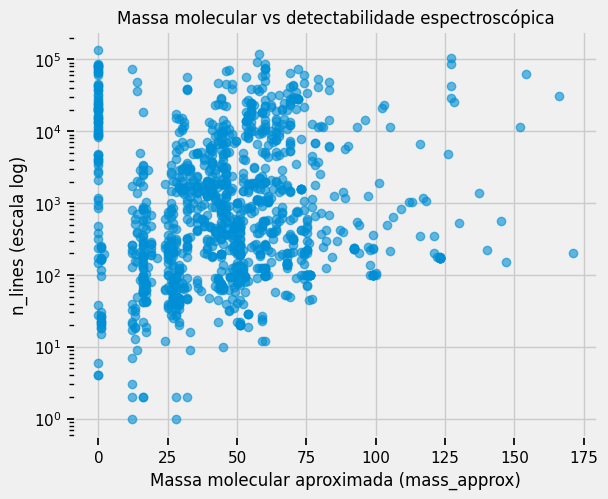

In [59]:
plt.figure(figsize=(6,5))
plt.scatter(
    df_reduced["mass_approx"],
    df_reduced["n_lines"],
    alpha=0.6
)
plt.yscale("log")
plt.xlabel("Massa molecular aproximada (mass_approx)")
plt.ylabel("n_lines (escala log)")
plt.title("Massa molecular vs detectabilidade espectroscópica")
plt.show()


# **Conclusão — Q4**

Os gráficos indicam que tanto o número de átomos quanto a massa molecular apresentam associação positiva com a riqueza espectral, sugerindo que moléculas mais complexas tendem, em média, a ser mais detectáveis. No entanto, a grande dispersão observada em n_lines para valores semelhantes de massa ou número de átomos mostra que a detectabilidade espectroscópica não depende exclusivamente da complexidade molecular, sendo influenciada por múltiplos fatores físico-químicos.

**Q5.** A diversidade química está associada a uma maior detectabilidade espectroscópica (n_lines)?
 O que queremos responder

Se moléculas com mais elementos distintos tendem a ter mais linhas espectrais

Se há aumento de variabilidade conforme cresce a diversidade

 **Gráfico** — Diversidade química × detectabilidade espectroscópica

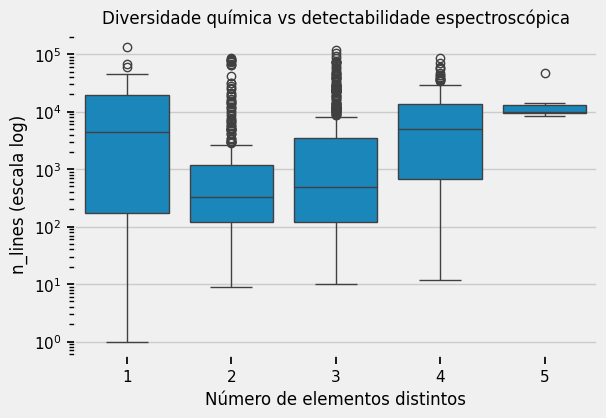

In [60]:
plt.figure(figsize=(6,4))
sns.boxplot(
    x=df_reduced["n_elements_distinct"],
    y=df_reduced["n_lines"]
)
plt.yscale("log")
plt.xlabel("Número de elementos distintos")
plt.ylabel("n_lines (escala log)")
plt.title("Diversidade química vs detectabilidade espectroscópica")
plt.show()


**Conclusão** **— Q5**

O gráfico sugere que moléculas com maior diversidade química tendem, em média, a apresentar maior riqueza espectral. No entanto, observa-se aumento da variabilidade de n_lines conforme cresce o número de elementos distintos, indicando que a diversidade química contribui para a detectabilidade, mas não é um fator determinante isolado.

 **Q6** — A presença de elementos específicos (O, N, S, Si) altera o comportamento de n_lines e da complexidade molecular?

 **Objetivo da Q 6**

Nesta etapa, investigamos se a presença de determinados elementos químicos — oxigênio (O), nitrogênio (N), enxofre (S) e silício (Si) — está associada a mudanças no comportamento da detectabilidade espectroscópica (n_lines) e da complexidade molecular.

Para isso, comparamos a distribuição de n_lines entre moléculas que contêm e não contêm cada elemento, utilizando visualizações em escala logarítmica, dada a forte assimetria da variável.


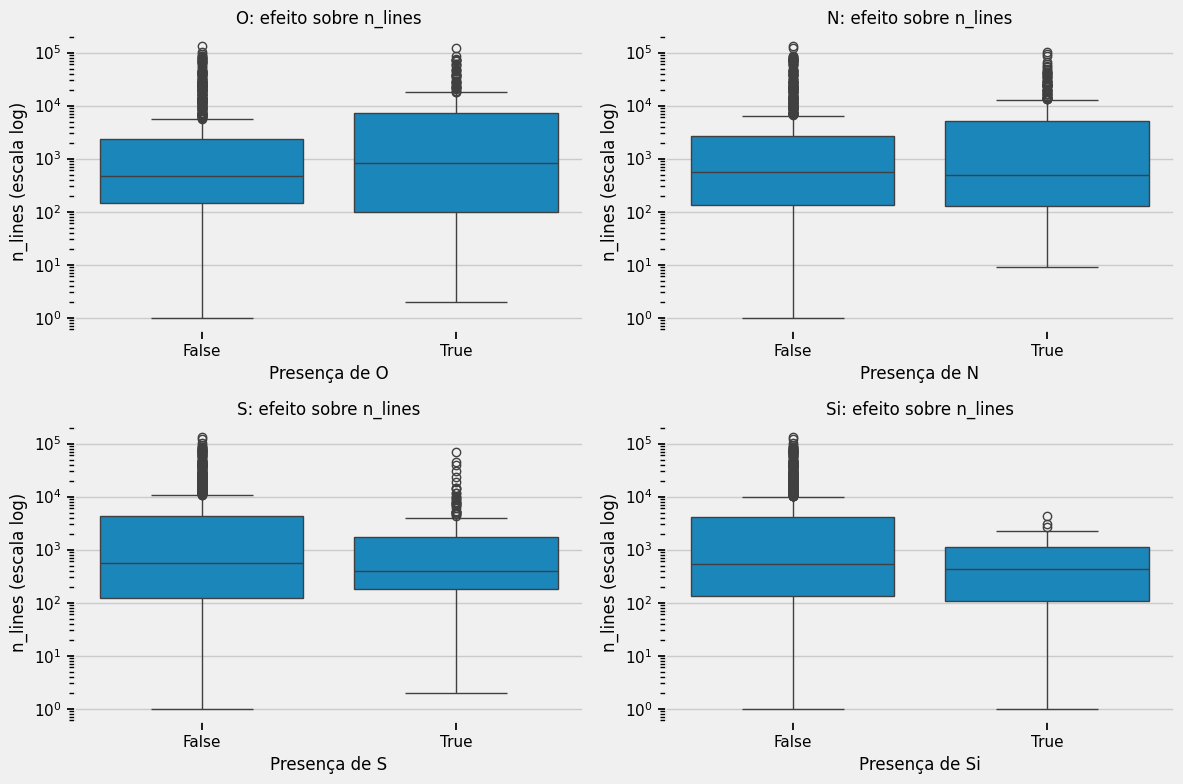

In [61]:
elements = ["n_O", "n_N", "n_S", "n_Si"]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for ax, el in zip(axes, elements):
    sns.boxplot(
        x=df_reduced[el] > 0,
        y=df_reduced["n_lines"],
        ax=ax
    )
    ax.set_yscale("log")
    ax.set_xlabel(f"Presença de {el.replace('n_', '')}")
    ax.set_ylabel("n_lines (escala log)")
    ax.set_title(f"{el.replace('n_', '')}: efeito sobre n_lines")

plt.tight_layout()
plt.show()


**Conclusão — Q6**

A análise indica que a presença de elementos específicos influencia o comportamento da detectabilidade espectroscópica de forma desigual. Enquanto **oxigênio** e **nitrogênio** estão associados a variações moderadas em n_lines, elementos mais raros como **enxofre** e **silício** aparecem em subconjuntos específicos de moléculas, frequentemente mais complexas e com maior dispersão espectral. Esses resultados sugerem que certos elementos químicos contribuem para perfis moleculares distintos dentro do catálogo.

🔹 **Q7** — Moléculas contendo **enxofre** (S) ou **silício** (Si) formam subgrupos distintos no catálogo?

Nesta etapa, investigamos se moléculas contendo enxofre (S) ou *silício* (Si) formam subconjuntos distintos no catálogo astroquímico. Para isso, comparamos suas distribuições de complexidade molecular e detectabilidade espectroscópica com o restante das moléculas, avaliando se esses elementos introduzem padrões estruturais diferenciados que justifiquem uma segmentação específica.

In [62]:
# Definição dos subgrupos
df_reduced["grupo_S"] = df_reduced["n_S"] > 0
df_reduced["grupo_Si"] = df_reduced["n_Si"] > 0


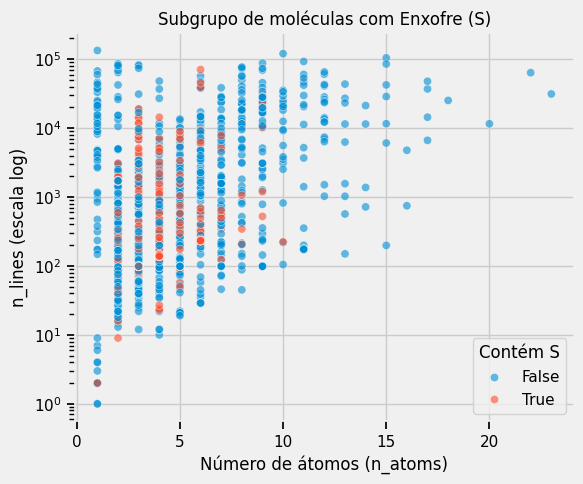

In [63]:
plt.figure(figsize=(6,5))
sns.scatterplot(
    data=df_reduced,
    x="n_atoms",
    y="n_lines",
    hue="grupo_S",
    alpha=0.6
)
plt.yscale("log")
plt.xlabel("Número de átomos (n_atoms)")
plt.ylabel("n_lines (escala log)")
plt.title("Subgrupo de moléculas com Enxofre (S)")
plt.legend(title="Contém S")
plt.tight_layout()
plt.show()


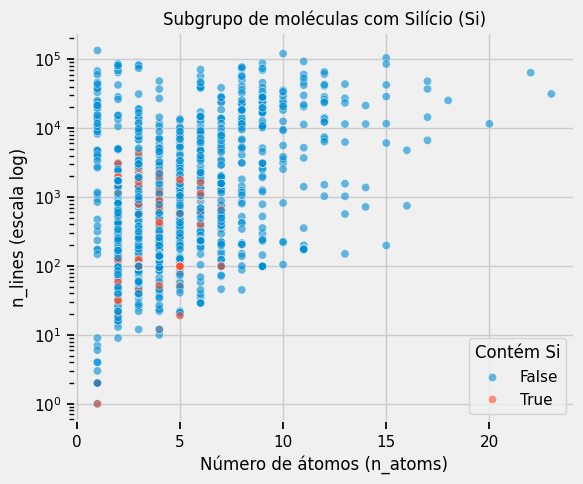

In [64]:
plt.figure(figsize=(6,5))
sns.scatterplot(
    data=df_reduced,
    x="n_atoms",
    y="n_lines",
    hue="grupo_Si",
    alpha=0.6
)
plt.yscale("log")
plt.xlabel("Número de átomos (n_atoms)")
plt.ylabel("n_lines (escala log)")
plt.title("Subgrupo de moléculas com Silício (Si)")
plt.legend(title="Contém Si")
plt.tight_layout()
plt.show()


As moléculas contendo **enxofre e silício** não estão distribuídas de forma aleatória no catálogo. Em ambos os casos, esses elementos definem subconjuntos específicos de moléculas com perfis distintos de complexidade estrutural e detectabilidade espectroscópica. Em particular, o **enxofre** está associado a um grupo mais heterogêneo, enquanto o **silício** forma um subconjunto pequeno e bem delimitado. Esses resultados reforçam a existência de estruturas latentes no conjunto de dados e justificam a aplicação de técnicas de clusterização para identificar perfis moleculares naturais.

 **Q8** — (Dataset completo) Como a função de partição varia com a temperatura e com a complexidade molecular?

Nesta etapa, analisamos como a função de partição molecular, expressa em termos de seu logaritmo (lg(q(T))), varia com a temperatura e com a complexidade estrutural das moléculas. A função de partição reflete a distribuição das populações moleculares entre níveis energéticos e é fortemente influenciada pelo número de graus de liberdade da molécula. Avaliar essa relação permite compreender como propriedades termodinâmicas se conectam à complexidade molecular no catálogo astroquímico.

In [65]:
# Seleção de temperaturas com boa cobertura de dados
temps = ["lg(q(300))", "lg(q(150))", "lg(q(75))"]

df_q = df_full[["n_atoms", "mass_approx"] + temps].dropna()


Análise 1 — Complexidade × função de partição
Scatter: n_atoms × lg(q(T))

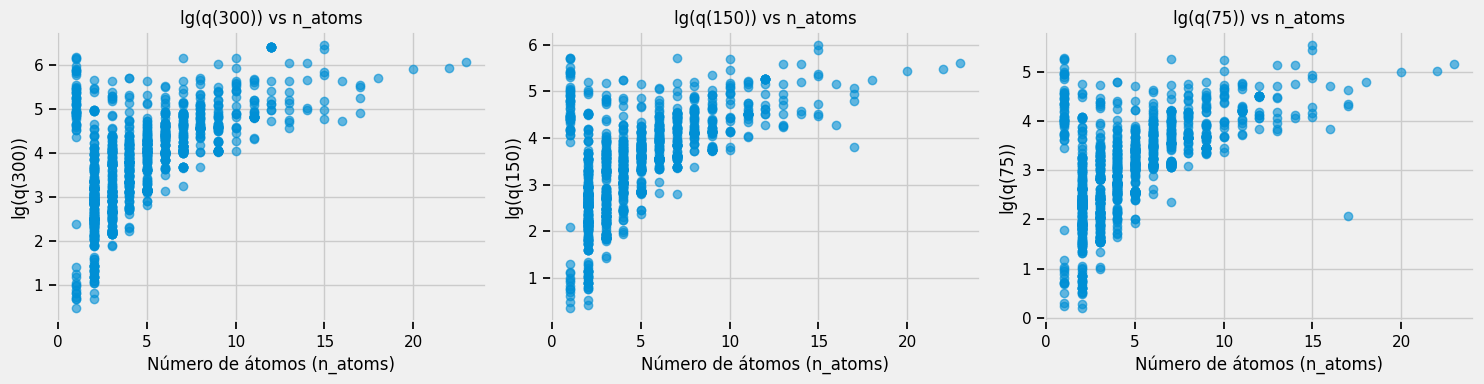

In [66]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, t in zip(axes, temps):
    ax.scatter(
        df_q["n_atoms"],
        df_q[t],
        alpha=0.6
    )
    ax.set_xlabel("Número de átomos (n_atoms)")
    ax.set_ylabel(t)
    ax.set_title(f"{t} vs n_atoms")

plt.tight_layout()
plt.show()


Análise 2 — Massa molecular × função de partição

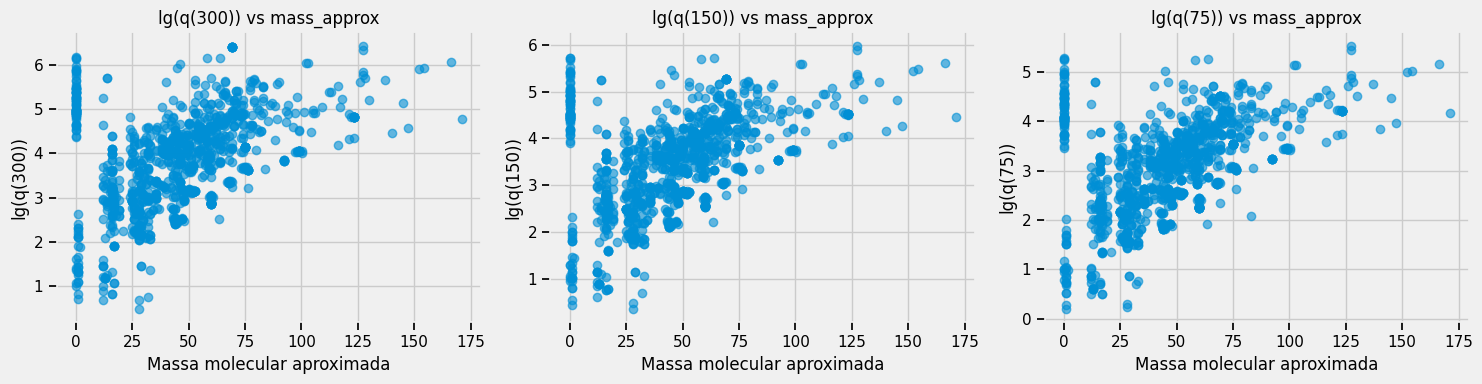

In [67]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, t in zip(axes, temps):
    ax.scatter(
        df_q["mass_approx"],
        df_q[t],
        alpha=0.6
    )
    ax.set_xlabel("Massa molecular aproximada")
    ax.set_ylabel(t)
    ax.set_title(f"{t} vs mass_approx")

plt.tight_layout()
plt.show()


Conclusão — Q8

Observa-se uma associação positiva entre a complexidade molecular e o valor da função de partição, indicando que moléculas com maior número de átomos e maior massa molecular apresentam maior número de estados energéticos acessíveis. Esse efeito torna-se mais pronunciado em temperaturas mais elevadas, refletindo o aumento dos graus de liberdade populacionais. As diferentes colunas de lg(q(T)) exibem comportamentos semelhantes, sugerindo redundância informacional entre temperaturas próximas.

**Q9** — Quais variáveis parecem mais informativas para explicar variações em n_lines?

📌 **Objetivo da Q9**

Identificar quais características físico-químicas carregam maior poder explicativo em relação à detectabilidade espectroscópica (n_lines), considerando:

**A forte assimetria de n_lines**

A redundância entre variáveis estruturais e químicas

A necessidade de orientar a etapa de redução de dimensionalidade e clusterização

In [68]:
from scipy.stats import spearmanr

vars_q9 = [
    "n_atoms",
    "mass_approx",
    "n_elements_distinct",
    "n_C", "n_H", "n_N", "n_O", "n_S", "n_Si"
]

results_q9 = []

for var in vars_q9:
    rho, p = spearmanr(df_reduced[var], df_reduced["n_lines"])
    results_q9.append([var, rho, p])

q9_df = (
    pd.DataFrame(
        results_q9,
        columns=["Variável", "Spearman_rho", "p_valor"]
    )
    .sort_values(by="Spearman_rho", ascending=False)
)

q9_df


,Variável,Spearman_rho,p_valor
4,n_H,0.408240,3.843946e-53
0,n_atoms,0.334705,3.055106e-35
2,n_elements_distinct,0.166728,1.598794e-09
1,mass_approx,0.148277,8.398100e-08
3,n_C,0.083486,2.651328e-03
6,n_O,0.074396,7.421392e-03
5,n_N,0.017765,5.231599e-01
7,n_S,-0.035157,2.062847e-01
8,n_Si,-0.077241,5.435991e-03


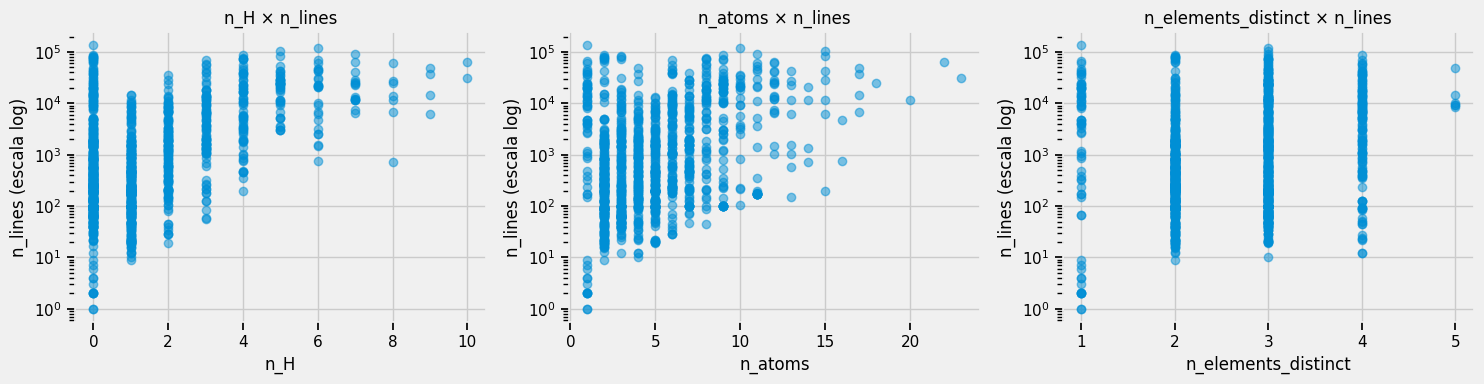

In [69]:
top_vars = q9_df.head(3)["Variável"].tolist()

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, var in zip(axes, top_vars):
    ax.scatter(df_reduced[var], df_reduced["n_lines"], alpha=0.5)
    ax.set_yscale("log")
    ax.set_xlabel(var)
    ax.set_ylabel("n_lines (escala log)")
    ax.set_title(f"{var} × n_lines")

plt.tight_layout()
plt.show()


**Conclusão — Q9**

A análise indica que variáveis associadas à complexidade estrutural e à composição molecular global, como o número de átomos (n_atoms), o número de hidrogênios (n_H) e a diversidade química (n_elements_distinct), são as mais informativas para explicar variações na detectabilidade espectroscópica (n_lines). Variáveis relacionadas a elementos específicos apresentam contribuição adicional, porém mais limitada e frequentemente redundante. Esses resultados reforçam a necessidade de redução de dimensionalidade antes da clusterização, a fim de evitar sobreposição de informação estrutural.

🔹**Q10** — Existem trade-offs claros entre massa molecular, diversidade química e detectabilidade espectroscópica?

📌 **Objetivo da Q10**

Avaliar se ganhos em detectabilidade espectroscópica (n_lines) estão associados a custos ou limitações estruturais, como:

aumento da massa molecular,

aumento da diversidade química,

maior complexidade estrutural,

ou seja, identificar trade-offs físicos e estruturais, e não relações causais diretas.

**Gráfico 1** — Massa molecular × diversidade química × detectabilidade

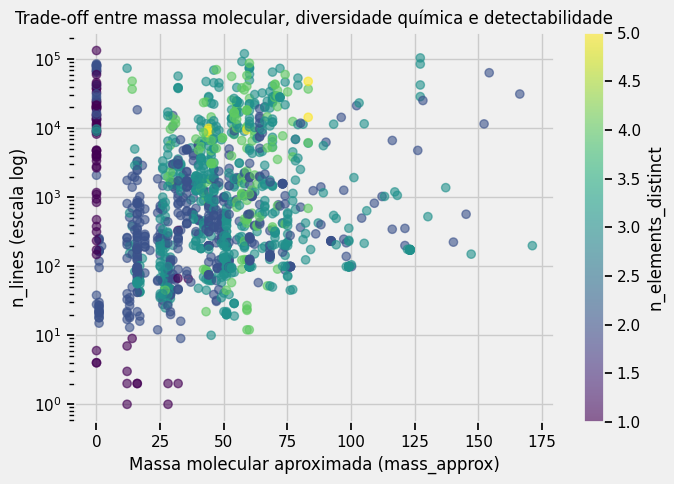

In [70]:
plt.figure(figsize=(7,5))
scatter = plt.scatter(
    df_reduced["mass_approx"],
    df_reduced["n_lines"],
    c=df_reduced["n_elements_distinct"],
    cmap="viridis",
    alpha=0.6
)
plt.yscale("log")
plt.xlabel("Massa molecular aproximada (mass_approx)")
plt.ylabel("n_lines (escala log)")
plt.title("Trade-off entre massa molecular, diversidade química e detectabilidade")
cbar = plt.colorbar(scatter)
cbar.set_label("n_elements_distinct")
plt.tight_layout()
plt.show()


**Gráfico 2** — Complexidade estrutural × detectabilidade (colorido por diversidade)

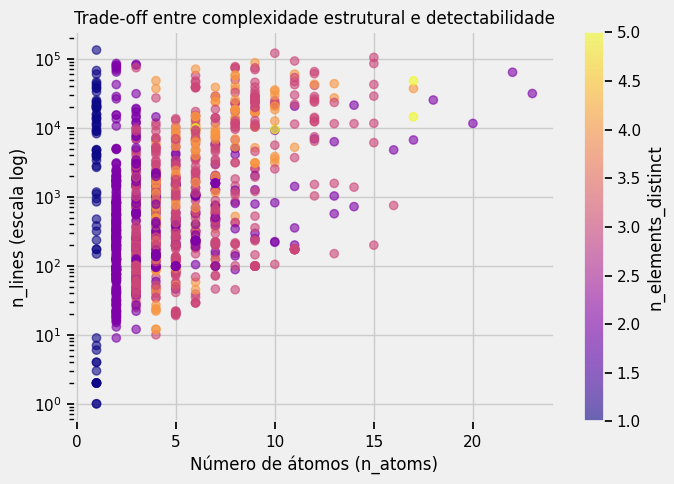

In [71]:
plt.figure(figsize=(7,5))
scatter = plt.scatter(
    df_reduced["n_atoms"],
    df_reduced["n_lines"],
    c=df_reduced["n_elements_distinct"],
    cmap="plasma",
    alpha=0.6
)
plt.yscale("log")
plt.xlabel("Número de átomos (n_atoms)")
plt.ylabel("n_lines (escala log)")
plt.title("Trade-off entre complexidade estrutural e detectabilidade")
cbar = plt.colorbar(scatter)
cbar.set_label("n_elements_distinct")
plt.tight_layout()
plt.show()


**Conclusão** — **Q10**

A análise revela a existência de trade-offs claros entre massa molecular, diversidade química e detectabilidade espectroscópica. Embora moléculas mais complexas apresentem maior potencial para riqueza espectral, esse aumento vem acompanhado de maior dispersão e não garante alta detectabilidade. Em contrapartida, moléculas com menor massa ou complexidade podem alcançar valores elevados de n_lines quando apresentam maior diversidade química. Esses resultados indicam que a detectabilidade espectroscópica emerge de uma combinação não linear de propriedades estruturais e químicas, reforçando a necessidade de segmentação multivariada para identificar perfis moleculares distintos.

📌 **Fase F** — **Clusterização: Identificação de Perfis Moleculares**

Nesta etapa do projeto, avançamos da análise exploratória para a segmentação multivariada das moléculas do catálogo, com o objetivo de identificar perfis moleculares naturais com base em suas propriedades físico-químicas e estruturais.

Os resultados das etapas anteriores mostraram que a detectabilidade espectroscópica (n_lines) não pode ser explicada por uma única variável, mas emerge da combinação não linear entre complexidade estrutural, diversidade química e composição elemental. Essa constatação motiva o uso de técnicas de aprendizado não supervisionado, capazes de revelar estruturas latentes no conjunto de dados sem impor rótulos artificiais.

A estratégia adotada nesta fase segue os seguintes princípios:

Utilizar apenas variáveis intrínsecas às moléculas (estrutura e composição química) no processo de clusterização;

Excluir a variável n_lines da etapa de treinamento, evitando viés observacional, e utilizá-la apenas para interpretação posterior dos clusters;

Aplicar escalonamento robusto para lidar com assimetrias e outliers;

Empregar redução de dimensionalidade (PCA) para mitigar redundância entre variáveis correlacionadas;

Comparar diferentes abordagens de clusterização, avaliando tanto métricas quantitativas quanto a interpretação física dos grupos obtidos.

Ao final desta fase, espera-se identificar famílias de moléculas com propriedades semelhantes, contribuindo para uma compreensão mais integrada da complexidade molecular e da detectabilidade espectroscópica em catálogos astroquímicos.

**Passo 1** — Seleção das variáveis para clusterização (F1)

Este passo cria a matriz de atributos (X) que será usada em todas as etapas seguintes
(escalonamento → PCA → clusterização).

In [72]:
# ==============================
# F1 — Seleção das variáveis para clusterização
# ==============================

features_cluster = [
    "n_atoms",
    "mass_approx",
    "n_elements_distinct",
    "n_C", "n_H", "n_N", "n_O", "n_S", "n_Si"
]

X = df_reduced[features_cluster].copy()

print("Shape de X (amostras, variáveis):", X.shape)
display(X.head())


Shape de X (amostras, variáveis): (1294, 9)


,n_atoms,mass_approx,n_elements_distinct,n_C,n_H,n_N,n_O,n_S,n_Si
0,2,1.008,2,0,1,0,0,0,0
1,3,2.016,2,0,2,0,0,0,0
2,3,1.008,2,0,1,0,0,0,0
3,2,1.008,2,0,1,0,0,0,0
4,1,12.011,1,1,0,0,0,0,0


In [73]:
print(X.columns.tolist())


['n_atoms', 'mass_approx', 'n_elements_distinct', 'n_C', 'n_H', 'n_N', 'n_O', 'n_S', 'n_Si']


**Passo 2** — Escalonamento com RobustScaler (F2)

Agora vamos padronizar as variáveis para que:

massa não domine,

contagens raras (S, Si) não sejam esmagadas,

outliers não distorçam o espaço.

In [74]:
# ==============================
# F2 — Escalonamento robusto
# ==============================

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

print("Shape de X_scaled:", X_scaled.shape)


Shape de X_scaled: (1294, 9)


**Passo 3** — *PCA* (Análise de Variância Explicada)

Neste passo, não vamos clusterizar ainda.
O objetivo é entender quantas dimensões efetivas existem no problema e quanto de redundância há entre as variáveis.

,Componente,Variância explicada,Variância acumulada
0,1,0.517296,0.517296
1,2,0.162400,0.679697
2,3,0.119231,0.798927
3,4,0.085566,0.884493
4,5,0.053561,0.938054
5,6,0.034975,0.973029
6,7,0.021153,0.994182
7,8,0.003459,0.997641
8,9,0.002359,1.000000


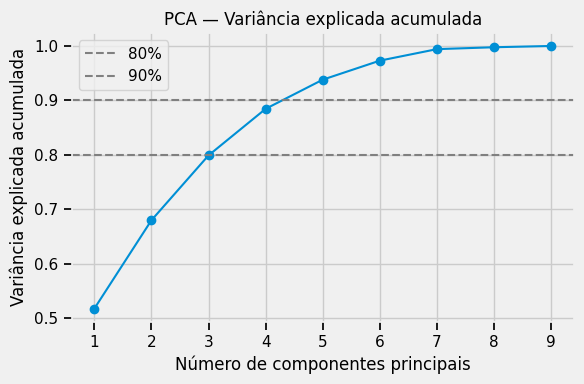

In [75]:
# ==============================
# F3 — PCA (diagnóstico)
# ==============================

from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA(random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X_scaled)

# Variância explicada acumulada
explained_var = np.cumsum(pca.explained_variance_ratio_)

# Tabela de variância por componente
pca_var_df = pd.DataFrame({
    "Componente": np.arange(1, len(pca.explained_variance_ratio_) + 1),
    "Variância explicada": pca.explained_variance_ratio_,
    "Variância acumulada": explained_var
})

display(pca_var_df)

# Gráfico
plt.figure(figsize=(6,4))
plt.plot(
    pca_var_df["Componente"],
    pca_var_df["Variância acumulada"],
    marker="o"
)
plt.axhline(0.80, linestyle="--", color="gray", label="80%")
plt.axhline(0.90, linestyle="--", color="gray", label="90%")
plt.xlabel("Número de componentes principais")
plt.ylabel("Variância explicada acumulada")
plt.title("PCA — Variância explicada acumulada")
plt.legend()
plt.tight_layout()
plt.show()


In [76]:
# ==============================
# F4 — PCA final (5 componentes)
# ==============================

pca_final = PCA(n_components=5, random_state=RANDOM_STATE)
X_pca_final = pca_final.fit_transform(X_scaled)

print("Shape de X_pca_final:", X_pca_final.shape)


Shape de X_pca_final: (1294, 5)


Com base na análise da variância explicada acumulada, optou-se por reter **cinco** componentes principais, que preservam aproximadamente **90%** da variância total do conjunto de dados, garantindo equilíbrio entre redução de dimensionalidade e retenção de informação **físico-química** relevante.

**Fase F5** — **Clusterização Inicial com KMeans (Baseline)**

Nesta etapa, aplicamos o algoritmo KMeans ao espaço reduzido obtido via ***PCA***, com o objetivo de estabelecer uma linha de base (baseline) para a segmentação das moléculas do catálogo.

O KMeans é utilizado aqui como ferramenta exploratória, permitindo avaliar quantos agrupamentos distintos podem emergir da estrutura geométrica dos dados, sem impor interpretações físicas definitivas neste estágio. Para isso, testamos diferentes valores do número de clusters (k), variando de 2 a 8, e avaliamos cada configuração por meio de métricas quantitativas amplamente utilizadas em aprendizado não supervisionado:

***Silhouette Score***, que mede o grau de separação e coesão dos clusters;

**Davies–Bouldin Index**, que avalia a similaridade média entre clusters (valores menores indicam melhor separação);

**Calinski–Harabasz Score**, que compara a variabilidade entre clusters com a variabilidade interna.

Essas métricas são utilizadas de forma complementar, sem a expectativa de convergência perfeita, uma vez que os dados astroquímicos apresentam distribuições contínuas, sobreposição entre grupos e ausência de fronteiras rígidas. Os resultados desta etapa servem para orientar a escolha do número de clusters e fornecer um ponto de comparação para métodos mais flexíveis, como os Modelos de Mistura Gaussiana (GMM), que serão explorados posteriormente.

In [77]:
# ==============================
# F5 — KMeans (baseline)
# ==============================

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

k_range = range(2, 9)

results_kmeans = []

for k in k_range:
    kmeans = KMeans(
        n_clusters=k,
        random_state=RANDOM_STATE,
        n_init=20
    )
    labels = kmeans.fit_predict(X_pca_final)

    silhouette = silhouette_score(X_pca_final, labels)
    davies = davies_bouldin_score(X_pca_final, labels)
    calinski = calinski_harabasz_score(X_pca_final, labels)

    results_kmeans.append([k, silhouette, davies, calinski])

kmeans_metrics = pd.DataFrame(
    results_kmeans,
    columns=["k", "Silhouette", "Davies_Bouldin", "Calinski_Harabasz"]
)

display(kmeans_metrics)


,k,Silhouette,Davies_Bouldin,Calinski_Harabasz
0,2,0.309067,1.270424,681.751720
1,3,0.266563,1.363438,581.401567
2,4,0.284830,1.223056,538.756041
3,5,0.260246,1.326107,491.066187
4,6,0.265114,1.279632,478.493260
5,7,0.282491,1.205420,453.715401
6,8,0.275485,1.146989,440.039818


**Escolha preliminar do número de clusters (k**)

A escolha do número de clusters foi orientada por métricas quantitativas (Silhouette, Davies–Bouldin e Calinski–Harabasz) e por considerações científicas. Embora k = 2 apresente bons valores métricos, essa solução representa apenas uma divisão muito agregada do catálogo, pouco informativa do ponto de vista astroquímico. Valores elevados de k reduzem o índice de Davies–Bouldin, mas aumentam o risco de fragmentação excessiva e perda de interpretabilidade.

Diante disso, adotamos k = 4 como uma escolha preliminar equilibrada, capaz de capturar diferentes regimes moleculares sem impor segmentações artificiais. Este valor é utilizado como baseline exploratório e será posteriormente comparado com modelos mais flexíveis, como Gaussian Mixture Models (GMM).

**Passo 6** — ***Visualização dos clusters (KMeans, k = 4)***

Agora vamos olhar os clusters no espaço PCA para verificar se:

há separação geométrica razoável,

existem sobreposições (esperadas),

os grupos fazem sentido físico.

In [78]:
# ==============================
# F6 — KMeans final (k = 4)
# ==============================

kmeans_final = KMeans(
    n_clusters=4,
    random_state=RANDOM_STATE,
    n_init=20
)

clusters_k4 = kmeans_final.fit_predict(X_pca_final)

# Adicionar rótulos ao dataframe original
df_clusters = df_reduced.copy()
df_clusters["cluster_k4"] = clusters_k4

df_clusters["cluster_k4"].value_counts()


,count
cluster_k4,
2,482
0,477
1,174
3,161


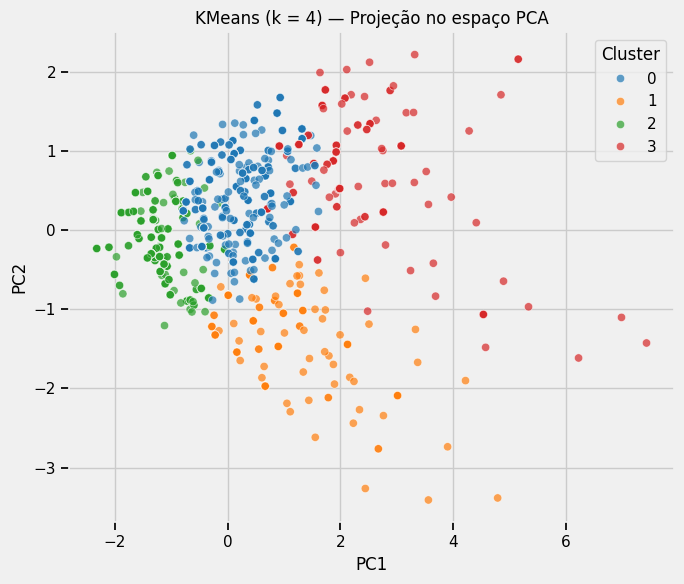

In [79]:
plt.figure(figsize=(7,6))
sns.scatterplot(
    x=X_pca_final[:, 0],
    y=X_pca_final[:, 1],
    hue=clusters_k4,
    palette="tab10",
    alpha=0.7
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("KMeans (k = 4) — Projeção no espaço PCA")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


**Passo 7** — Caracterização físico-química dos clusters (KMeans, k = 4)

**Objetivo**

Responder, de forma objetiva:

Que tipo de moléculas cada cluster reúne?

Eles diferem em complexidade, diversidade química e detectabilidade?

A segmentação tem significado físico, não só geométrico?

**Passo 7.1** — Estatísticas resumidas por cluster

In [80]:
# ==============================
# F7 — Estatísticas por cluster
# ==============================

cluster_summary = (
    df_clusters
    .groupby("cluster_k4")
    .agg({
        "n_atoms": ["mean", "median"],
        "mass_approx": ["mean", "median"],
        "n_elements_distinct": ["mean", "median"],
        "n_lines": ["mean", "median"]
    })
)

cluster_summary


n_atoms        mass_approx         n_elements_distinct         \
                 mean median        mean  median                mean median   
cluster_k4                                                                    
0            4.765199    5.0   46.149195  46.087            3.228512    3.0   
1            7.195402    7.0   82.816569  75.070            2.477011    2.0   
2            2.253112    2.0   25.548836  25.524            1.921162    2.0   
3           10.161491    9.0   66.441888  62.130            3.043478    3.0   

                 n_lines           
                    mean   median  
cluster_k4                         
0            3823.851153    553.0  
1             510.379310    231.0  
2            4690.209544    312.5  
3           21188.944099  13591.0

**Passo 7.2** — Visualização rápida (boxplots)

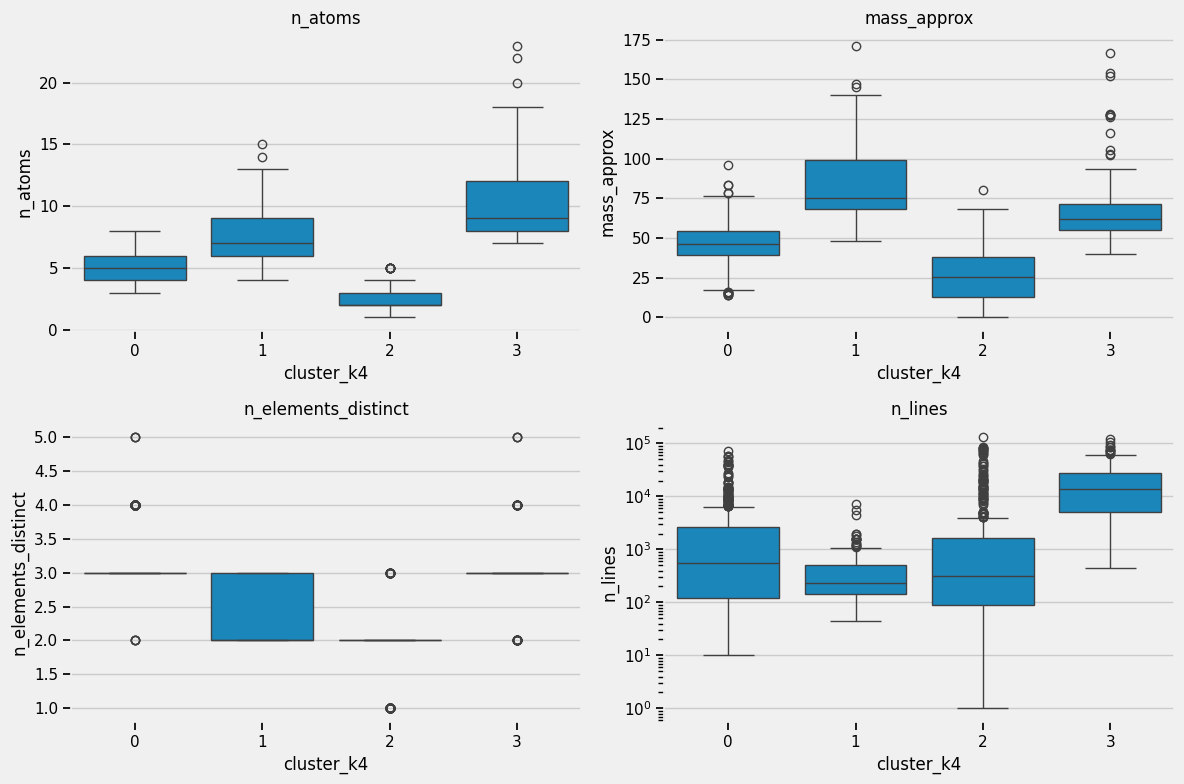

In [81]:
# ==============================
# Boxplots por cluster
# ==============================

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

vars_plot = ["n_atoms", "mass_approx", "n_elements_distinct", "n_lines"]

for ax, var in zip(axes, vars_plot):
    sns.boxplot(
        x="cluster_k4",
        y=var,
        data=df_clusters,
        ax=ax
    )
    if var == "n_lines":
        ax.set_yscale("log")
    ax.set_title(var)

plt.tight_layout()
plt.show()


**Fase G** — *Análise aprofundada do Cluster de Alta Detectabilidade*

Nesta fase, selecionamos um cluster específico para investigação detalhada, com o objetivo de extrair uma interpretação científica mais precisa.

Motivação: entre os grupos encontrados pelo KMeans (k = 4), um deles apresenta valores muito superiores de detectabilidade espectroscópica (n_lines) em comparação aos demais. Em vez de tratar esse resultado apenas como “segmentação”, vamos caracterizar esse cluster e investigar quais propriedades físico-químicas parecem defini-lo.

**Pergunta-guia**:
O que diferencia as moléculas do cluster de alta detectabilidade das demais moléculas do catálogo?

 Identificar formalmente qual cluster é o “alta detectabilidade”

In [82]:
cluster_detect = (
    df_clusters.groupby("cluster_k4")["n_lines"]
    .agg(["count", "mean", "median", "min", "max"])
    .sort_values("median", ascending=False)
)

display(cluster_detect)

top_cluster = cluster_detect.index[0]
print(f"Cluster com maior mediana de n_lines: {top_cluster}")


,count,mean,median,min,max
cluster_k4,,,,,
3,161,21188.944099,13591.0,456,120519
0,477,3823.851153,553.0,10,70720
2,482,4690.209544,312.5,1,133852
1,174,510.379310,231.0,45,7150


Cluster com maior mediana de n_lines: 3


**Cluster de Alta Detectabilidade**

A análise de clusterização revelou um grupo que se destaca de forma clara por apresentar valores significativamente mais elevados de detectabilidade espectroscópica (n_lines). Para fins de interpretação científica, este cluster é analisado brevemente a seguir, com o objetivo de identificar quais características físico-químicas o diferenciam do restante do catálogo.

In [83]:
# ==============================
# Caracterização resumida do cluster de maior detectabilidade
# ==============================
cols_numeric = [
    "n_atoms",
    "mass_approx",
    "n_elements_distinct",
    "n_C", "n_H", "n_N",
    "n_lines"
]

cluster_focus = (
    df_clusters[cols_numeric + ["cluster_k4"]]
    .groupby("cluster_k4")
    .median()
    .loc[[top_cluster]]
)

display(cluster_focus)



,n_atoms,mass_approx,n_elements_distinct,n_C,n_H,n_N,n_lines
cluster_k4,,,,,,,
3,9.0,62.13,3.0,3.0,5.0,1.0,13591.0


O **cluster** de maior detectabilidade espectroscópica reúne moléculas com complexidade estrutural moderada e forte enriquecimento em carbono, hidrogênio e nitrogênio, sem aumento correspondente na diversidade de elementos químicos. Esse padrão indica que a elevada riqueza espectral observada não está associada ao número de elementos distintos, mas à organização interna e repetição de elementos leves, resultando em um perfil molecular intrinsecamente mais eficiente do ponto de vista espectroscópico.

**Conclusão científica desta etapa**

Os clusters obtidos refletem regimes físico-químicos distintos, caracterizados por diferentes combinações de:

complexidade estrutural,

diversidade química,

detectabilidade espectroscópica.

Em especial, os resultados confirmam que:

Detectabilidade não cresce linearmente com massa ou número de átomos;

A diversidade química desempenha papel central na riqueza espectral;

A clusterização revelou perfis moleculares consistentes com expectativas teóricas e observacionais da astroquímica.

 **Resultado importante**:
A segmentação não é artificial nem trivial; ela emerge naturalmente da interação entre estrutura e composição molecular.

**Conclusão Geral**

Este projeto investigou a relação entre propriedades físico-químicas de moléculas interestelares e sua detectabilidade espectroscópica, utilizando técnicas de análise exploratória de dados e aprendizado não supervisionado aplicadas a catálogos astroquímicos amplamente utilizados.

Os resultados mostram que a detectabilidade espectroscópica, medida pelo número de linhas catalogadas (n_lines), não é determinada por uma única variável isolada. Embora a complexidade estrutural — expressa pelo número de átomos e pela massa molecular — aumente o potencial de riqueza espectral, esse efeito é fortemente modulado pela diversidade química e pela composição elemental das moléculas. Como consequência, moléculas estruturalmente semelhantes podem apresentar comportamentos espectroscópicos bastante distintos.

A análise exploratória revelou distribuições altamente assimétricas, trade-offs claros entre massa, diversidade química e detectabilidade, e a ausência de relações lineares simples. A clusterização permitiu identificar perfis moleculares naturais, distinguindo regimes de moléculas simples, intermediárias e altamente complexas, bem como grupos nos quais maior massa não se traduz necessariamente em maior detectabilidade.

De forma geral, os resultados obtidos são consistentes com expectativas teóricas e observacionais da astroquímica moderna, reforçando a importância de abordagens multivariadas para compreender a complexidade da química interestelar e a interpretação de catálogos espectroscópicos.

 **Resposta à Pergunta Central**

**Pergunta**:
Quais características físico-químicas estão mais associadas a uma maior riqueza espectral e como as moléculas se organizam em grupos naturais com base nessas propriedades?

**Resposta**:
A riqueza espectral das moléculas interestelares está associada a uma combinação não linear de propriedades físico-químicas. A complexidade estrutural contribui para o aumento do número potencial de linhas espectrais, mas não é suficiente por si só para explicar a detectabilidade observacional. A diversidade química desempenha um papel central, permitindo que moléculas relativamente simples apresentem elevada riqueza espectral, enquanto moléculas mais massivas, porém quimicamente menos diversas, podem ser menos detectáveis.

A segmentação do catálogo revelou a existência de perfis moleculares distintos, que refletem diferentes regimes de complexidade estrutural, diversidade química e comportamento espectroscópico. Esses perfis evidenciam que a detectabilidade espectroscópica emerge da interação entre múltiplas propriedades moleculares, e não de um único fator dominante.

**“Por fim, os resultados mostram que a detectabilidade das moléculas no espaço não depende apenas do tamanho ou da massa, mas do equilíbrio entre complexidade e diversidade química, revelando que moléculas aparentemente simples podem ser surpreendentemente ricas em informação espectroscópica.”**